## Programas para todos los apartados


Como para muchos apartados se pide que se estudie lo mismo, así agrupo los programas en uno y menos lío.

#### Descripción del programa:

Se usa el programa en c de cada apartado. En todos los apartados es básicamente el mismo, solo que cambio las cosas que dice cada apartado.

Dicho esto, comencemos con el programa.




### Programa 7 plot optimización

En este programa se leerán los ficheros: tiempoparalelizar.txt, tiempoSINPARALELIZAR.txt y tiempoCORES.txt

Se plotean los datos según su N y si pertenece a Joel o a mi pc.

El procesador de mi portátil es un intel i5 12450 H, con 8 cores y 12 hilos.

También cuento con una gráfica nvidia rtx 3050 en el portátil.



#### 7.1 Tiempo sin paralelizar

Ahora se cogen los datos de tiempoSINPARALELIZAR.txt y se plotean según que algoritmo se haya usado. La leyenda se lee así:

Si lo ha realizado mi portátil lleva PC delante, y si lo hace JOEL, llevará JOEL.

A continuación se dice el algoritmo usado. El algoritmo 'sin' es sin usar openMP y a través de visualstudio, es decir, único a mi PC. El 'omp' indica que solo ha sido compilado con openmp y que este se encargue. Si pone 'o1', 'o2', 'o3', u 'ofast' esto es que se ha usado dicho algoritmo a la hora de compilar el programa.

El programa que se usa es apartado1SIN.c

Necesita:

- tiempoSINPARALELIZAR.txt
- Modificar el tiempo total y el paso si es necesario en el título y el nombre del png.

Suelta:

- Gráfica con los tiempos sin paralelizar con los tiempos de optimización tanto en joel como en mi ordenador.


C:\Users\diego\AppData\Local\Temp\ipykernel_5740\1003920797.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  datos = pd.read_csv(ruta_archivo, delim_whitespace=True, skiprows=1, header=None)


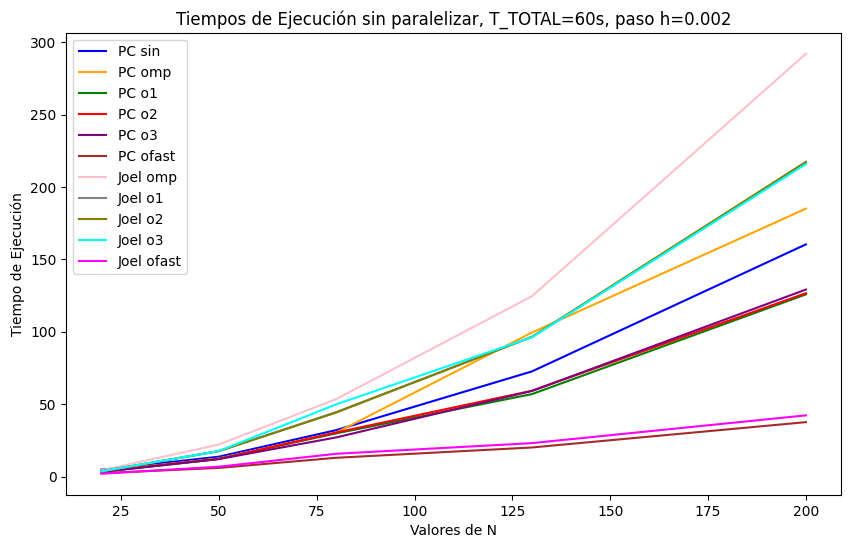

<Figure size 640x480 with 0 Axes>

In [9]:
# Tiempo sin paralelizar

import pandas as pd
import matplotlib.pyplot as plt
import os

# Ruta del archivo
ruta_archivo = 'c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_1_Lennard-Jonnes/Apartado_Optimizacion/tiempoSINPARALELIZAR.txt'

# Leer el archivo, saltando la primera línea
datos = pd.read_csv(ruta_archivo, delim_whitespace=True, skiprows=1, header=None)

# Extraer valores de X y tiempos de los algoritmos
valores_x = datos.iloc[:, 0]
algoritmos = datos.iloc[:, 1:]

# Cambiar nombres de los algoritmos
nombres_algoritmos = [
    'PC sin', 'PC omp', 'PC o1', 'PC o2', 'PC o3',
    'PC ofast', 'Joel omp', 'Joel o1', 'Joel o2', 'Joel o3', 'Joel ofast'
]
algoritmos.columns = nombres_algoritmos

# Paleta de colores distinguibles
colores = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta'
]

# Graficar los tiempos de cada algoritmo
plt.figure(figsize=(10, 6))
for i, nombre in enumerate(algoritmos.columns):
    plt.plot(valores_x, algoritmos[nombre], label=nombre, color=colores[i % len(colores)])

# Añadir leyenda, etiquetas y título
plt.legend()
plt.xlabel('Valores de N')
plt.ylabel('Tiempo de Ejecución')
plt.title('Tiempos de Ejecución sin paralelizar, T_TOTAL=60s, paso h=0.002')

# Mostrar y guardar la gráfica
plt.show()
ruta_salida = os.path.join(os.path.dirname(ruta_archivo), 'tiempos_sinparalelizar_T=60s_paso=0.002.png')
plt.savefig(ruta_salida)

Como podemos ver, el algoritmo de optimización Ofast es el que vence y por mucho a los demás.

Sin algoritmos, Joel es el que más tiempo tarda, por lo que el procesador de este será peor que el mío.

Me sorprende ver que los algoritmos O1, O2, O3 aunque sí optimizan el programa, lo hacen de una manera similar, estando los 3 casi en la misma curva. 

#### 7.2 Tiempo paralelizado

A continuación se usan los hilos para ver cual sería el mejor rendimiento. Uno podría pensar que cuantos más hilos mejor, pero no es el caso como veremos.

Necesita:
- tiempoparalelizar.txt

Suelta:
- tiempos_paralelizar_T=60s_paso=0.002.png

C:\Users\diego\AppData\Local\Temp\ipykernel_5740\2911557590.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  datos = pd.read_csv(ruta_archivo, delim_whitespace=True, skiprows=1, header=None)


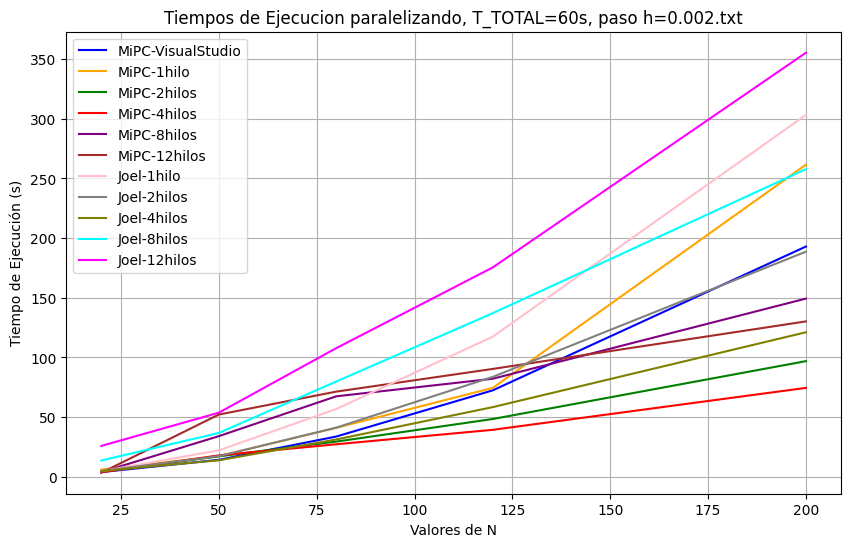

In [ ]:
# Tiempo paralelizado


import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo
ruta_archivo = 'tiempoparalelizar.txt'

# Leer el archivo, saltando la primera línea
datos = pd.read_csv(ruta_archivo, delim_whitespace=True, skiprows=1, header=None)

# Extraer valores de X y las curvas Y
valores_x = datos.iloc[:, 0]
curvas = datos.iloc[:, 1:]

# Modifica aquí los nombres de las curvas según tus necesidades
nombres_curvas = [
    'MiPC-VisualStudio', 'MiPC-1hilo', 'MiPC-2hilos', 'MiPC-4hilos', 'MiPC-8hilos', 'MiPC-12hilos',
    'Joel-1hilo', 'Joel-2hilos', 'Joel-4hilos', 'Joel-8hilos', 'Joel-12hilos'
]
curvas.columns = nombres_curvas[:curvas.shape[1]]

# Paleta de colores muy distintos
colores = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta'
]

# Graficar las curvas
plt.figure(figsize=(10, 6))
for i, nombre in enumerate(curvas.columns):
    plt.plot(valores_x, curvas[nombre], label=nombre, color=colores[i % len(colores)])

plt.legend()
plt.xlabel('Valores de N')
plt.ylabel('Tiempo de Ejecución (s)')
plt.title('Tiempos de Ejecucion paralelizando, T_TOTAL=60s, paso h=0.002.txt')
plt.grid(True)
plt.savefig('tiempos_paralelizar_T=60s_paso=0.002.png')
plt.show()

Aunque en un principio yo pensé que a mayor cantidad de hilos, mayor capacidad de procesar datos, esto no parece ser el caso.

Ya sea por cómo está estructurado el programa, los datos más bajos son mi pc con 4 hilos, seguido de 2 hilos y luego joel con 4 hilos. 

Que se alcance este mínimo en 4 hilos supongo a que se debe por la capacidad de paralelización de mi programa, es decir, el coste de pasar datos de un hilo a otro es mayor que un hilo lo procese todo.

Si bien podía haber incluído más comandos pragma y demás, creo que he hecho todo lo posible para paralelizar. Igual, si no hubiera metido esos comandos pragma, la diferencia entre usar más hilos hubiera sido menor, pero a mayor hilos, mayor potencia. Aún así, estos comandos creo que no ralentizan el programa, todo lo contrario, por lo que creo que aún así, con muchos más hilos el programa hubiera tardado más que con la configuracion previamente dicha.

#### 7.3 Ahora en Joel cambiamos los threads y los cores

Los comandos para hacerlo es:

- 1º editamos con vi
- 2º Ponemos las configs que queremos: Lo primero son los cores, threads. Se pone 0-4 y esto significa que se usan 5 cores.
    - configs=(
  "0-1,2"    # 2 cores (0-1) y 2 threads
  "0-3,1"
  "0-3,4"
  "0-3,8"
  "0-7,12" 
)
- 3º Luego compilamos con gcc normal:
    - gcc -fopenmp apartado1OMP.c -o apartado1 -lm
- 4º Hacemos el bucle for para que me lo saque todo
    - for config in "${configs[@]}"; do
        cores=$(echo $config | cut -d',' -f1)
        threads=$(echo $config | cut -d',' -f2)
  
        if [[ $cores == *-* ]]; then
            start=$(echo $cores | cut -d'-' -f1)
            end=$(echo $cores | cut -d'-' -f2)
            num_cores=$((end - start + 1))
        else
            num_cores=1
        fi
  
        printf "%-6s | %-7s | " "$num_cores" "$threads"

        export OMP_NUM_THREADS=$threads
        taskset -c $cores time -f "%e" ./apartado1
    done

- 5º Repetimos todo sin el paso 2


Necesita:
- tiempoCORES.txt

Suelta:
- tiempos_Cores_T=60s_paso=0.002.png

C:\Users\diego\AppData\Local\Temp\ipykernel_5740\3721757314.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  datos = pd.read_csv(datafile, delim_whitespace=True, skiprows=1, header=None)


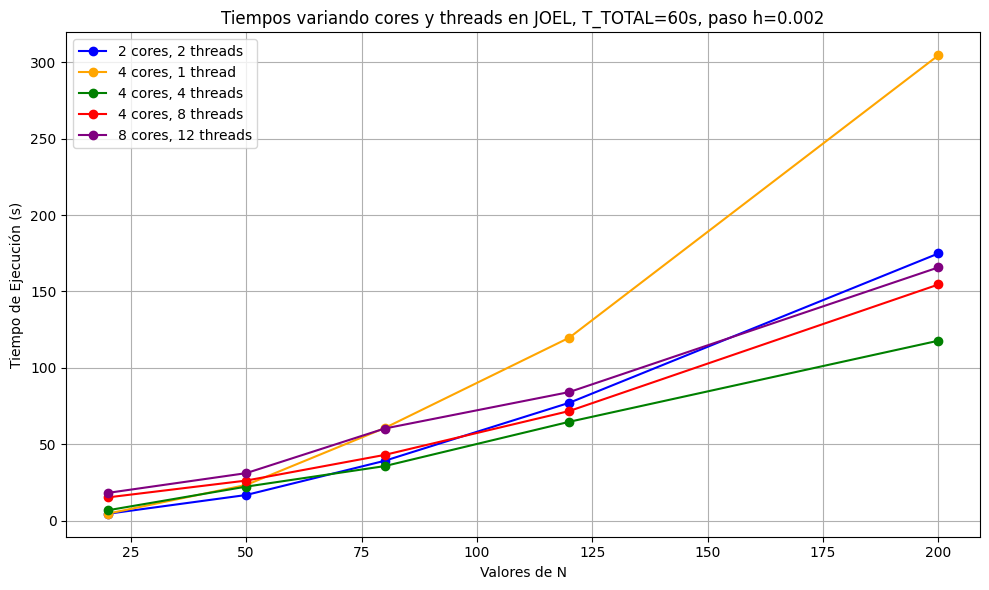

In [8]:
# Tiempo con cores

import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo
datafile = 'tiempoCORES.txt'

# Leer el archivo, saltando la primera línea
datos = pd.read_csv(datafile, delim_whitespace=True, skiprows=1, header=None)

# Extraer valores de X y las curvas Y
valores_x = datos.iloc[:, 0]
curvas = datos.iloc[:, 1:]

# Modifica aquí los nombres de las curvas según tus necesidades
nombres_curvas = [
    '2 cores, 2 threads', '4 cores, 1 thread', '4 cores, 4 threads', '4 cores, 8 threads', '8 cores, 12 threads'
][:curvas.shape[1]]
curvas.columns = nombres_curvas

# Paleta de colores muy distintos
colores = [
    'blue', 'orange', 'green', 'red', 'purple'
]

# Graficar las curvas
plt.figure(figsize=(10, 6))
for i, nombre in enumerate(curvas.columns):
    plt.plot(valores_x, curvas[nombre], label=nombre, color=colores[i % len(colores)], marker='o')

plt.legend()
plt.xlabel('Valores de N')
plt.ylabel('Tiempo de Ejecución (s)')
plt.title('Tiempos variando cores y threads en JOEL, T_TOTAL=60s, paso h=0.002')
plt.grid(True)
plt.tight_layout()
plt.savefig('tiempos_Cores_T=60s_paso=0.002.png')
plt.show()

De nuevo, no siempre con un número mayor de núcleos obtienes más capacidad de procesador. En Joel al aumentar los cores de nuevo se alcanza un mínimo con 4 cores y 4 hilos, por tanto podemos concluir que es la manera en la que mi programa está estructurado que el menor tiempo posible es con 4 equipos haciendo operaciones a la vez.

De nuevo, pienso a que se deben a los comandos pragma que permiten al programa trabajar más rápido con 4 hilos o cores.